# Library imports & Dataset loading

In [183]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns

df  = pd.read_csv(r"C:\Users\gosta\Desktop\Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data Cleaning

#### Step 1:  Remove Nulls

In [184]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [185]:
# Dropping Cabin column as it has too many missing values
df = df.drop(columns=['Cabin'])

# Filled missing values in 'Embarked' with the most frequent value being 'S'
modeOfEmbarked = df['Embarked'].mode()[0]
df['Embarked'] = df['Embarked'].fillna(modeOfEmbarked)

# Filled missing values in 'Age' with the median age based on 'Pclass' and 'Sex' for better accuracy
medianOfAges = df.groupby(['Pclass', 'Sex'])['Age'].transform('median')
df['Age'] = df['Age'].fillna(medianOfAges)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [186]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### Step 2: Remove Duplicates

In [187]:
df.duplicated().sum()

np.int64(0)

#### Step 3: Standardize column names

In [188]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [189]:
#Convert uppercase to lowercase, remove leading and trailing spaces, and replace spaces with underscores
df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')

In [190]:
df.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'embarked'],
      dtype='object')

#### Step 4: Fix data types

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          891 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [192]:
# Convert 'pclass', 'sex', and 'embarked' to categorical data types
df['pclass'] = df['pclass'].astype('category')
df['sex']= df['sex'].astype('category')
df['embarked'] = df['embarked'].astype('category')

# convert 'survived' to boolean type
df['survived'] = df['survived'].astype(bool)


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   passengerid  891 non-null    int64   
 1   survived     891 non-null    bool    
 2   pclass       891 non-null    category
 3   name         891 non-null    object  
 4   sex          891 non-null    category
 5   age          891 non-null    float64 
 6   sibsp        891 non-null    int64   
 7   parch        891 non-null    int64   
 8   ticket       891 non-null    object  
 9   fare         891 non-null    float64 
 10  embarked     891 non-null    category
dtypes: bool(1), category(3), float64(2), int64(3), object(2)
memory usage: 52.7+ KB


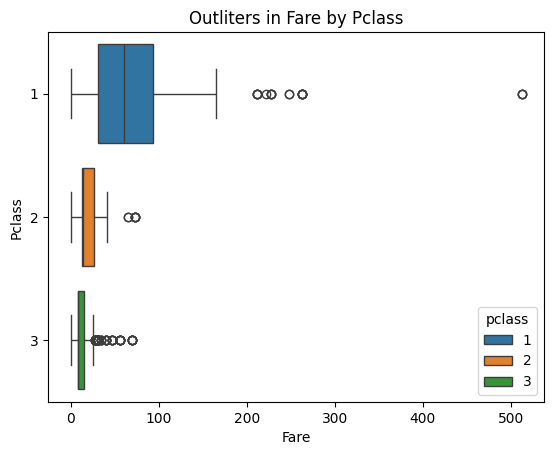

In [194]:
# Statistically, there appears to be many outliers. However, since these data are accurate and represent real fares
# I will not be removing any of them. You can use the following data to remove the outliers as needed.

# The only exception is one extreme outlier in 1st class with a fare of 500+, which I will remove.
sns.boxplot(x=df['fare'], y = df['pclass'], hue=df['pclass'])
plt.title('Outliters in Fare by Pclass')
plt.xlabel('Fare')
plt.ylabel('Pclass')
plt.show()

In [195]:
df[df['fare'] > 500]

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked
258,259,True,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
679,680,True,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
737,738,True,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C


In [196]:
df = df.drop(index=[258, 679, 737])

# Summary Statistics

In [210]:
df.describe()

,passengerid,age,sibsp,parch,fare
count,888.000000,888.000000,888.000000,888.000000,888.000000
mean,445.618243,29.091408,0.524775,0.381757,30.582164
std,257.405474,13.321948,1.104186,0.806949,41.176366
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,21.500000,0.000000,0.000000,7.895800
50%,445.500000,26.000000,0.000000,0.000000,14.454200
75%,667.250000,36.000000,1.000000,0.000000,30.771850
max,891.000000,80.000000,8.000000,6.000000,263.000000


In [217]:
df.groupby('pclass')['fare'].describe()

C:\Users\gosta\AppData\Local\Temp\ipykernel_11740\2859373857.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('pclass')['fare'].describe()


,count,mean,std,min,25%,50%,75%,max
pclass,,,,,,,,
1,213.0,78.124061,59.996151,0.0,30.6958,57.9792,91.0792,263.00
2,184.0,20.662183,13.417399,0.0,13.0000,14.2500,26.0000,73.50
3,491.0,13.675550,11.778142,0.0,7.7500,8.0500,15.5000,69.55


In [ ]:
# Out of 313 Females, only 232 survived.
# Out of 575 Males, only 107 survived.
df.groupby('sex')['survived'].describe()

C:\Users\gosta\AppData\Local\Temp\ipykernel_11740\3236221719.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sex')['survived'].describe()


,count,unique,top,freq
sex,,,,
female,313,2,True,232
male,575,2,False,468


# Visualization

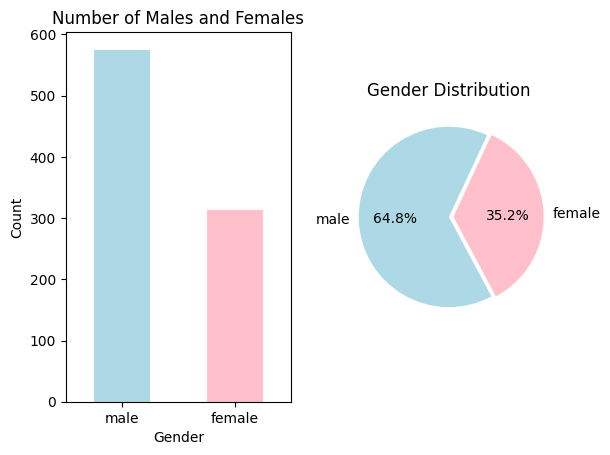

In [218]:
#Most of the passengers on the Titanic where males
plt.subplot(1,2,1)
df['sex'].value_counts().plot(kind='bar', color = ['lightblue', 'pink'])
plt.title('Number of Males and Females')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1,2,2)
df['sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'pink'], startangle=65, explode=(0,0.05))
plt.title('Gender Distribution')
plt.ylabel('')

plt.show()

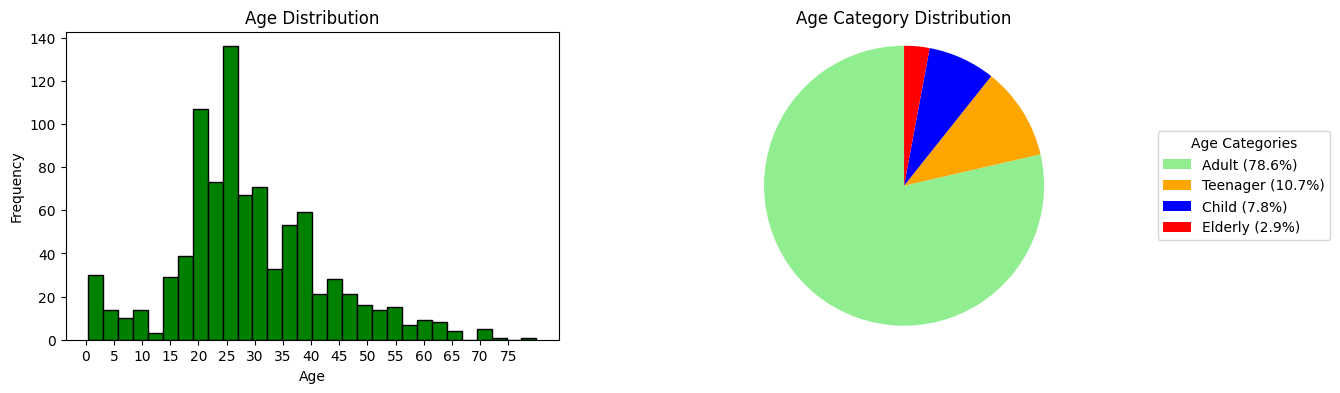

In [220]:
#The majority of the passengers were adults

def age_category(age):
    if age <= 12:
        return 'Child'
    elif 13 <= age <= 19:
        return 'Teenager'
    elif 20 <= age <= 59:
        return 'Adult'
    elif age >= 60:
        return 'Elderly'
df['age_category'] = df['age'].apply(age_category)

plt.figure(figsize=(14, 4))
plt.subplot(1,2,1)
plt.hist(df['age'], bins=30, color='green', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(range(0, 80, 5))


plt.subplot(1,2,2)
total = sum(df['age_category'].value_counts().values)
wedges, texts = plt.pie(df['age_category'].value_counts().values, colors=['lightgreen', 'orange', 'blue', 'red'], startangle=90)
legend_labels = [f"{label} ({size / total:.1%})" for label, size in zip(df['age_category'].value_counts().index, df['age_category'].value_counts().values)]
plt.legend(wedges, legend_labels, title='Age Categories', loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
plt.title('Age Category Distribution')
plt.axis('equal')
plt.show()

C:\Users\gosta\AppData\Local\Temp\ipykernel_11740\2854456399.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df[df['survived'] == 1].groupby('sex').size().plot(kind='bar', color=['pink', 'lightblue'])


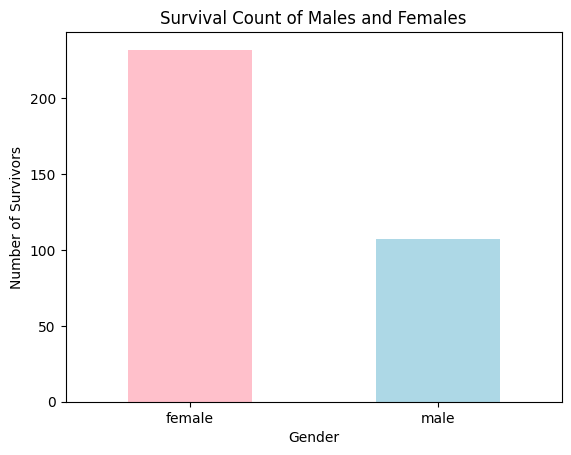

In [ ]:
#It appears that females survival rates were much higher which shows that there must have been a protocol to save females over males.
df[df['survived'] == 1].groupby('sex').size().plot(kind='bar', color=['pink', 'lightblue'])
plt.title('Survival Count of Males and Females')
plt.xlabel('Gender')
plt.ylabel('Number of Survivors')
plt.xticks(rotation=0)
plt.show()

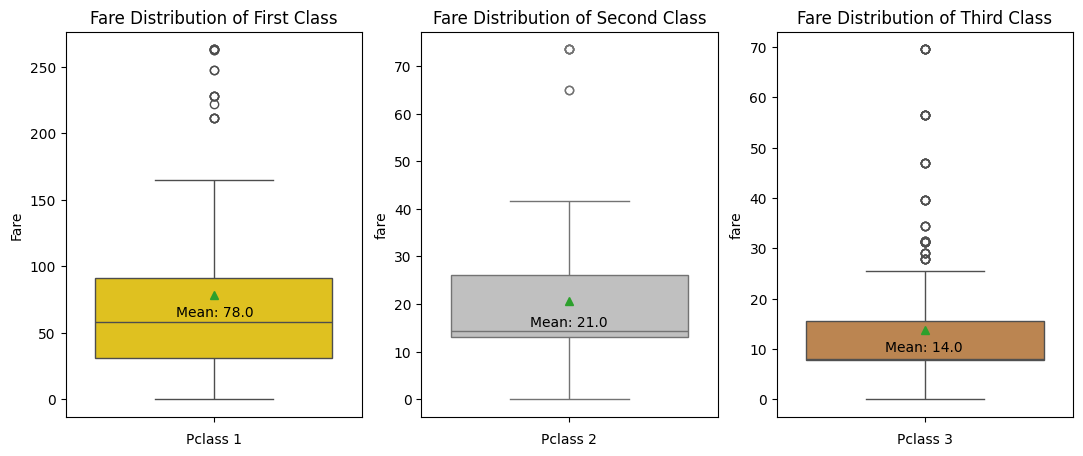

In [251]:
# This shows that fare is generally higher for passengers in first class compared to those in second and third class.
# Also it shows that the fare for the thirs class had a lot of outliers compared to the other classes.
# which may indicate fraud from sellers or wrong data entry.

plt.figure(figsize=(13, 5))
plt.subplot(1,3,1)
data = df[df['pclass'] == 1]['fare']
sns.boxplot(data, color='gold', showmeans = True)
plt.title('Fare Distribution of First Class')
plt.xlabel('Pclass 1')
plt.ylabel('Fare')
plt.gcf().text(0.21, 0.31, f"Mean: {data.mean().round()}")

plt.subplot(1,3,2)
data = df[df['pclass'] == 2]['fare']
sns.boxplot(data, color='silver', showmeans = True)
plt.title('Fare Distribution of Second Class')
plt.xlabel('Pclass 2')
plt.gcf().text(0.482, 0.29, f"Mean: {data.mean().round()}")

plt.subplot(1,3,3)
data = df[df['pclass'] == 3]['fare']
sns.boxplot(data, color='peru', showmeans = True)
plt.title('Fare Distribution of Third Class')
plt.xlabel('Pclass 3')
plt.gcf().text(0.755, 0.24, f"Mean: {data.mean().round()}")
plt.show()

C:\Users\gosta\AppData\Local\Temp\ipykernel_11740\2631532966.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = pd.pivot_table(df, values='survived', index='sex', columns='pclass', aggfunc='mean')


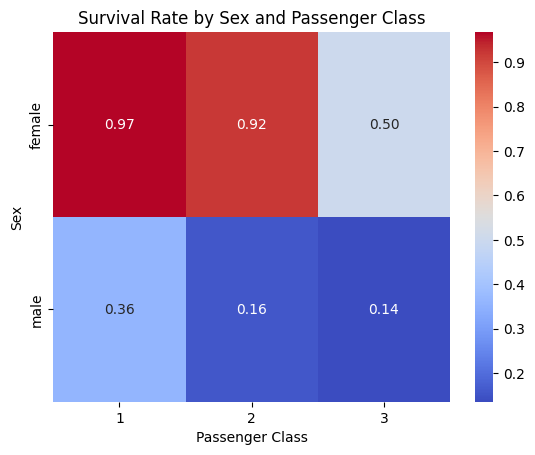

In [ ]:
# an average of 95% of females survived both in first and second class, while only 50% survived in third class.
# This shows that the wealth level played a significant role in survival rates.

# Since the majority of male passengers did not survive, this shows that females were prioritized during the evacuation process.
pivot = pd.pivot_table(df, values='survived', index='sex', columns='pclass', aggfunc='mean')

sns.heatmap(pivot, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Survival Rate by Sex and Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Sex')
plt.show()